In [2]:
import xarray as xr
import numpy as np
import hvplot.xarray
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
%matplotlib inline
import xroms
import cmocean.cm as cmo
import xcmocean


In [9]:
ds = xr.open_dataset("https://tds.marine.rutgers.edu/thredds/dodsC/roms/doppio/DopAnV3R3-ini2007_da/year_avg")

In [10]:
ds

<xarray.Dataset>
Dimensions:      (s_rho: 40, s_w: 41, eta_rho: 106, xi_rho: 242, eta_u: 106, xi_u: 241, eta_v: 105, xi_v: 242, eta_psi: 105, xi_psi: 241, ocean_time: 15)
Coordinates:
  * s_rho        (s_rho) float64 -0.9875 -0.9625 -0.9375 ... -0.0375 -0.0125
  * s_w          (s_w) float64 -1.0 -0.975 -0.95 -0.925 ... -0.05 -0.025 0.0
    lon_rho      (eta_rho, xi_rho) float64 ...
    lat_rho      (eta_rho, xi_rho) float64 ...
    lon_u        (eta_u, xi_u) float64 ...
    lat_u        (eta_u, xi_u) float64 ...
    lon_v        (eta_v, xi_v) float64 ...
    lat_v        (eta_v, xi_v) float64 ...
    lon_psi      (eta_psi, xi_psi) float64 ...
    lat_psi      (eta_psi, xi_psi) float64 ...
  * ocean_time   (ocean_time) datetime64[ns] 2007-07-01T18:00:00 ... 2021-07-...
Dimensions without coordinates: eta_rho, xi_rho, eta_u, xi_u, eta_v, xi_v, eta_psi, xi_psi
Data variables: (12/28)
    spherical    int32 ...
    xl           float64 ...
    el           float64 ...
    Vtransform   int32 ...
    Vstretching  int32 ...
    theta_s      float64 ...
    ...           ...
    vbar         (ocean_time, eta_v, xi_v) float64 ...
    u            (ocean_time, s_rho, eta_u, xi_u) float64 ...
    v            (ocean_time, s_rho, eta_v, xi_v) float64 ...
    w            (ocean_time, s_w, eta_rho, xi_rho) float64 ...
    temp         (ocean_time, s_rho, eta_rho, xi_rho) float64 ...
    salt         (ocean_time, s_rho, eta_rho, xi_rho) float64 ...
Attributes:
    history:  Sat Mar 12 23:47:29 2022: ncra doppio_2020_mon.nc doppio_2020.nc
    NCO:      netCDF Operators version 4.8.0 (Homepage = http://nco.sf.net, C...
    title:    DopAnV3R3-ini2007 - ROMS DOPPIO 7km reanalysis (assimilative), ...
    summary:  doppio

In [11]:
dsx = xroms.open_netcdf("https://tds.marine.rutgers.edu/thredds/dodsC/roms/doppio/DopAnV3R3-ini2007_da/mon_avg")

In [12]:
dsx

<xarray.Dataset>
Dimensions:      (s_rho: 40, s_w: 41, eta_rho: 106, xi_rho: 242, xi_u: 241, eta_v: 105, ocean_time: 180)
Coordinates: (12/31)
  * s_rho        (s_rho) float64 -0.9875 -0.9625 -0.9375 ... -0.0375 -0.0125
  * s_w          (s_w) float64 -1.0 -0.975 -0.95 -0.925 ... -0.05 -0.025 0.0
    lon_rho      (eta_rho, xi_rho) float64 dask.array<chunksize=(106, 242), meta=np.ndarray>
    lat_rho      (eta_rho, xi_rho) float64 dask.array<chunksize=(106, 242), meta=np.ndarray>
    lon_u        (eta_rho, xi_u) float64 dask.array<chunksize=(106, 241), meta=np.ndarray>
    lat_u        (eta_rho, xi_u) float64 dask.array<chunksize=(106, 241), meta=np.ndarray>
    ...           ...
    z_rho_v0     (s_rho, eta_v, xi_rho) float64 dask.array<chunksize=(40, 105, 242), meta=np.ndarray>
    z_rho_psi0   (s_rho, eta_v, xi_u) float64 dask.array<chunksize=(40, 105, 241), meta=np.ndarray>
    z_w0         (s_w, eta_rho, xi_rho) float64 dask.array<chunksize=(41, 106, 242), meta=np.ndarray>
    z_w_u0       (s_w, eta_rho, xi_u) float64 dask.array<chunksize=(41, 106, 241), meta=np.ndarray>
    z_w_v0       (s_w, eta_v, xi_rho) float64 dask.array<chunksize=(41, 105, 242), meta=np.ndarray>
    z_w_psi0     (s_w, eta_v, xi_u) float64 dask.array<chunksize=(41, 105, 241), meta=np.ndarray>
Data variables: (12/72)
    spherical    int64 1
    xl           float64 ...
    el           float64 ...
    Vtransform   int32 ...
    Vstretching  int32 ...
    theta_s      float64 ...
    ...           ...
    dV_w_u       (ocean_time, s_w, eta_rho, xi_u) float64 dask.array<chunksize=(1, 41, 106, 241), meta=np.ndarray>
    dV_v         (ocean_time, s_rho, eta_v, xi_rho) float64 dask.array<chunksize=(1, 40, 105, 242), meta=np.ndarray>
    dV_w_v       (ocean_time, s_w, eta_v, xi_rho) float64 dask.array<chunksize=(1, 41, 105, 242), meta=np.ndarray>
    dV_psi       (ocean_time, s_rho, eta_v, xi_u) float64 dask.array<chunksize=(1, 40, 105, 241), meta=np.ndarray>
    dV_w_psi     (ocean_time, s_w, eta_v, xi_u) float64 dask.array<chunksize=(1, 41, 105, 241), meta=np.ndarray>
    rho0         int64 1025
Attributes:
    title:                   DopAnV3R3-ini2007 - ROMS DOPPIO 7km reanalysis (...
    summary:                 doppio
    EXTRA_DIMENSION.tracer:  2

In [13]:
dsx.temp.cf.isel(Z=-1)

<xarray.DataArray 'temp' (ocean_time: 180, eta_rho: 106, xi_rho: 242)>
dask.array<getitem, shape=(180, 106, 242), dtype=float64, chunksize=(1, 106, 242), chunktype=numpy.ndarray>
Coordinates:
    s_rho       float64 -0.0125
    lon_rho     (eta_rho, xi_rho) float64 dask.array<chunksize=(106, 242), meta=np.ndarray>
    lat_rho     (eta_rho, xi_rho) float64 dask.array<chunksize=(106, 242), meta=np.ndarray>
  * ocean_time  (ocean_time) datetime64[ns] 2007-01-17 2007-02-15 ... 2021-12-15
  * xi_rho      (xi_rho) int64 0 1 2 3 4 5 6 7 ... 235 236 237 238 239 240 241
  * eta_rho     (eta_rho) int64 0 1 2 3 4 5 6 7 ... 99 100 101 102 103 104 105
    z_rho       (ocean_time, eta_rho, xi_rho) float64 dask.array<chunksize=(1, 106, 242), meta=np.ndarray>
    z_rho0      (eta_rho, xi_rho) float64 dask.array<chunksize=(106, 242), meta=np.ndarray>
Attributes:
    long_name:      time-averaged potential temperature
    units:          Celsius
    time:           ocean_time
    field:          temperature, scalar, series
    standard_name:  sea_water_potential_temperature
    grid:           <xgcm.Grid>\nX Axis (not periodic, boundary=None):\n  * c...

(array([6.000000e+01, 3.236000e+03, 1.199466e+06, 3.393990e+05,
        3.719300e+05, 4.970610e+05, 5.710050e+05, 7.319440e+05,
        6.660100e+05, 2.372490e+05]),
 array([-7.74001677, -3.89067296, -0.04132915,  3.80801467,  7.65735848,
        11.50670229, 15.35604611, 19.20538992, 23.05473373, 26.90407755,
        30.75342136]),
 <BarContainer object of 10 artists>)

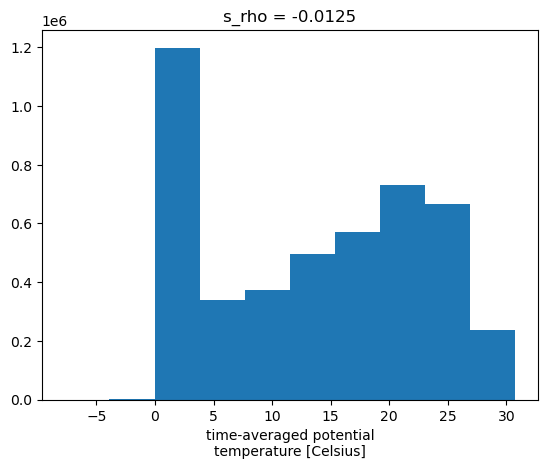

In [14]:
dsx.temp.cf.isel(Z=-1).plot()